# Simulation of a Rocket Flight
#### Hope is to make a workable simulation of a rocket's flight to explain physics priciples to my physics of rocketry flight. Thought it may be a good place to practice some math and real time data visulation. 

Let's do a test flight with a super simple physics simulation. We will do a super basic projectile problem of a rocket.

Define the problem: A rocket is shot up into the air with a mass X and the engine exerts a force of XX on the rocket for the duration of the rocket's booting through flight. Once the rocket engine burns out, the rocket is then in free fall until it reaches the ground. 

mass = m

velocity = v

force = F

acceleration of rocket = a 

acceleration due to gravity = g = 9.8 m/s^2

t = time

∆t = timestep 

https://en.wikipedia.org/wiki/WAC_Corporal

In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets

In [2]:
def append_all(
        time, 
        mass, 
        y_position, 
        y_velocity, 
        net_force, 
        acceleration, 
        thrust,
        weight,
        drag,
        air_density):
    
    time_data.append(time)
    mass_data.append(mass)
    y_position_data.append(y_position)
    y_velocity_data.append(y_velocity)
    net_force_data.append(net_force)
    acceleration_data.append(acceleration)
    thrust_data.append(thrust)
    weight_data.append(weight)
    drag_data.append(drag)
    air_density_data.append(air_density)

def velocity_calc(
        initial_velocity, 
        acceleration, 
        time_step):
    velocity = (initial_velocity + acceleration * time_step)
    return velocity

def position_calc(
        position, 
        velocity, 
        acceleration, 
        time_step):
    position = (position + velocity * time_step 
                + 1/2 * acceleration * time_step ** 2)
    return position

def net_force_during_thrust_calc(
        thrust, drag, weight):
    net_force = thrust - (drag + weight)
    return net_force
    
def net_force_after_thrust_calc(
        drag, 
        weight, 
        velocity):
    if velocity > 0:
        net_force = -1 * (drag + weight)
    else:
        net_force = drag - weight
    return net_force
    
def mass_calc(
        rocket_mass, 
        total_fuel_mass, 
        fuel_consumption_rate, 
        time):
    remaining_fuel = total_fuel_mass \
                     - (fuel_consumption_rate * time)
    if remaining_fuel > 0:
        mass = rocket_mass \
                + (total_fuel_mass - fuel_consumption_rate * time)
    else: 
        mass = rocket_mass
    return mass

def acceleration_calc(
        force, mass):
    acceleration = net_force / mass
    return acceleration
    
def weight_calc(mass):
    weight = mass * g
    return weight

def air_density_calc(y_position): #Works generally up to 80000m
    air_density = 1.31 * np.exp(-1.23*10**(-4)*y_position)
    return air_density
    
def drag_calc(
        drag_coeficient, 
        air_density, 
        cross_sectional_area, 
        velocity):
    drag = 0.5 * drag_coeficient \
            * air_density * cross_sectional_area \
            * velocity ** 2
    return drag

def thrust_calc(thrust_force):
    thrust = thrust_force
    return thrust



In [3]:
# These will not change. These will stay constant and be our starting values during each simulation. 

TIME = 0 #Starting Time
POSITION = 0 #Starting Position
VELOCITY = 0 #Starting Velocity
ACCELERATION = 0 #Starting Acceleration
g = 9.81 #Acceleration due to gravity (Approximate for up to 25000m)

# Time step we will use in our calculations
t_step = 0.01


# The below values will change depending on what the user inputs. Will do this eventually. 
mass_of_rocket = 200 #kg
mass_of_rocket_fuel = 20 #kg
consumption_rate_of_fuel = 2 #kg/s
time_of_force = mass_of_rocket_fuel / consumption_rate_of_fuel
force_of_thrust = 22000 #N

#More variables to change
drag_coeficient = 0.15
cross_sectional_area = 0.07



time_data = []
mass_data = []
y_position_data = []
y_velocity_data = []
net_force_data = []
acceleration_data = []
thrust_data = []
weight_data = []
drag_data = []
air_density_data = []

while True: 
    if TIME <= time_of_force:
        TIME += t_step
        mass = mass_calc(mass_of_rocket, mass_of_rocket_fuel, consumption_rate_of_fuel, TIME)
        weight = weight_calc(mass)
        air_density = air_density_calc(POSITION)
        drag = drag_calc(drag_coeficient, air_density, cross_sectional_area, VELOCITY)
        thrust = thrust_calc(force_of_thrust)
        POSITION = position_calc(POSITION, VELOCITY, ACCELERATION, t_step)
        VELOCITY = velocity_calc(VELOCITY, ACCELERATION, t_step)
        net_force = net_force_during_thrust_calc(force_of_thrust, drag, weight)
        ACCELERATION = acceleration_calc(net_force, mass)
        append_all(TIME, mass, POSITION, VELOCITY, net_force, ACCELERATION, thrust, weight, drag, air_density)
    elif POSITION > 0: 
        TIME += t_step
        mass = mass_calc(mass_of_rocket, mass_of_rocket_fuel, consumption_rate_of_fuel, TIME)
        weight = weight_calc(mass)
        air_density = air_density_calc(POSITION)
        drag = drag_calc(drag_coeficient, air_density, cross_sectional_area, VELOCITY)
        thrust = thrust_calc(force_of_thrust)
        POSITION = position_calc(POSITION, VELOCITY, ACCELERATION, t_step)
        VELOCITY = velocity_calc(VELOCITY, ACCELERATION, t_step)
        net_force = net_force_after_thrust_calc(drag, weight, VELOCITY)
        ACCELERATION = acceleration_calc(net_force, mass)
        append_all(TIME, mass, POSITION, VELOCITY, net_force, ACCELERATION, thrust, weight, drag, air_density)
    else:
        break

        
data_list = [mass_data, 
             y_position_data,
             y_velocity_data,
             net_force_data,
             acceleration_data,
             thrust_data,
             weight_data,
             drag_data,
             air_density_data]
data_headings = ['mass', 
                 'position', 
                 'velocity', 
                 'net_force', 
                 'acceleration', 
                 'thrust', 
                 'weight', 
                 'drag', 
                 'air_density']

simulation_data = pd.DataFrame({"Time":time_data})

for i in range(len(data_list)):
    simulation_data[data_headings[i]] = data_list[i]
    
# print(simulation_data[['Time', 'position', 'velocity', 'acceleration', 'drag', 'air_density']].tail(60))

print(len(simulation_data.drag))

17657


In [4]:
max_altitude = round(simulation_data['position'].max(), 2)
max_velocity = round(simulation_data['velocity'].max(), 2)
max_acceleration = round(simulation_data['acceleration'].max(), 2)

max_net_force = round(simulation_data['net_force'].max(), 2)
max_drag =  round(simulation_data['drag'].max(), 2)

min_air_density = round(simulation_data['air_density'].min(), 6)

print(f"""
    The maximum altitude of this flight was {max_altitude} meters.
    The maximum velocity of this flight was {max_velocity} meters/second.
    The maximum acceleration of this flight was {max_acceleration} meters/second^2.
    \n
    The maximum net force during this flight was {max_net_force} Newtons.
    The maximum drag during this flight was {max_drag} Newtons.
    \n \n
    The minimum air density of this flight was {min_air_density} (Insert air density units here).
""")


    The maximum altitude of this flight was 35886.71 meters.
    The maximum velocity of this flight was 886.49 meters/second.
    The maximum acceleration of this flight was 91.04 meters/second^2.
    

    The maximum net force during this flight was 19843.91 Newtons.
    The maximum drag during this flight was 3171.48 Newtons.
    
 

    The minimum air density of this flight was 0.015859 (Insert air density units here).



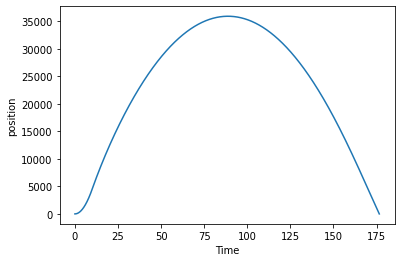

In [5]:
# Position Data
sns.lineplot(data = simulation_data, x='Time', y=simulation_data['position'])
plt.pyplot.show()

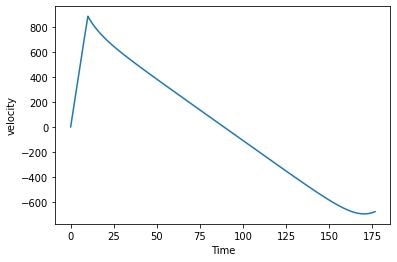

In [6]:
# Velocity Data
sns.lineplot(data = simulation_data, x='Time', y=simulation_data['velocity'])
plt.pyplot.show()

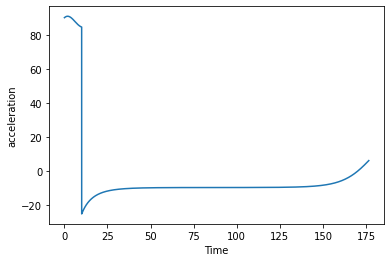

In [7]:
# Acceleration Data
sns.lineplot(data = simulation_data, x='Time', y=simulation_data['acceleration'])

plt.pyplot.show()

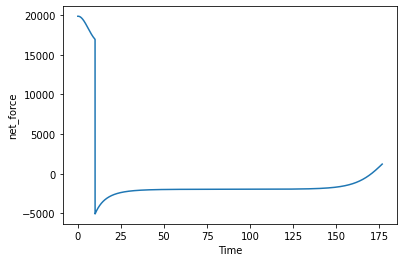

In [8]:
# Net force data
sns.lineplot(data = simulation_data, x='Time', y=simulation_data['net_force'])
plt.pyplot.show()

In [9]:
# print(simulation_data[simulation_data['drag'] < 300].tail(60))

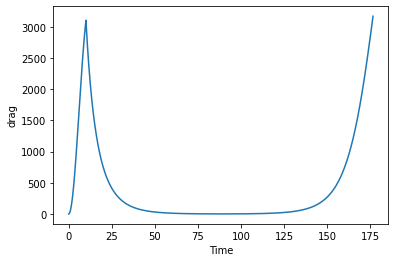

In [10]:
# Drag Data
sns.lineplot(data = simulation_data, x='Time', y=simulation_data['drag'])
plt.pyplot.show()



# Bokeh (package for overlaying)

In [11]:
# Asking users to input variables. 

# while True:
#     try:
#         mass = int(input('Mass of Rocket (Value between 1 and 100): '))
#         if mass < 1 or mass > 100:
#             raise ValueError #this will send it to the print message and back to the input option
#         break
#     except ValueError:
#         print("Invalid integer. The number must be in the range of 1-10.")